# Model test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from neuralforecast.core import NeuralForecast
from neuralforecast.models import TimeXer, NHITS, TSMixerx

from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mae, mse

In [2]:
BE_url = "../data/BE.csv"
DE_url = "../data/DE.csv"

BE_df = pd.read_csv(BE_url, parse_dates=["date"])
BE_df["unique_id"] = "BE"
BE_df = BE_df.rename(columns={
    "date": "ds",
    " Generation forecast": "Generation forecast",
    " System load forecast": "System load forecast",
    "OT": "y"
})
DE_df = pd.read_csv(DE_url, parse_dates=["date"])
DE_df["unique_id"] = "DE"
DE_df = DE_df.rename(columns={
    "date": "ds",
    " Wind power forecast": "Wind power forecast",
    " Ampirion zonal load forecast": "Ampirion zonal load forecast",
    "OT": "y"
})

In [3]:
HORIZON = 24
INPUT_SIZE = 168
FREQ = "h"
BE_EXOG_LIST = ["Generation forecast", "System load forecast"]
DE_EXOG_LIST = ["Wind power forecast", "Ampirion zonal load forecast"]

In [4]:
models = [
    TimeXer(
        h=HORIZON,
        input_size=INPUT_SIZE,
        n_series=1,
        futr_exog_list=BE_EXOG_LIST,
        patch_len=HORIZON,
        max_steps=1000
    ),
    NHITS(
        h=HORIZON,
        input_size=INPUT_SIZE,
        futr_exog_list=BE_EXOG_LIST,
        max_steps=1000
    ),
    TSMixerx(
        h=HORIZON,
        input_size=INPUT_SIZE,
        n_series=1,
        futr_exog_list=BE_EXOG_LIST,
        max_steps=1000
    )
]

Seed set to 1
Seed set to 1
Seed set to 1


In [5]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # 使用单个 GPU

nf = NeuralForecast(models=models, freq=FREQ)
BE_cv_preds = nf.cross_validation(BE_df, step_size=HORIZON, n_windows=10)
BE_cv_preds.head()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type                   | Params | Mode 
----------------------------------------------------------------
0 | loss         | MAE                    | 0      | train
1 | padder_train | ConstantPad1d          | 0      | train
2 | scaler       | TemporalNorm           | 0      | train
3 | en_embedding | EnEmbedding            | 12.8 K | train
4 | ex_embedding | DataEmbedding_inverted | 86.5 K | train
5 | encoder      | Encoder                | 8.4 M  | train

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 3.2 M  | train
-------------------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.843    Total estimated model params size (MB)
34        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                | Type              | Params | Mode 
------------------------------------------------------------------
0 | loss                | MAE               | 0      | train
1 | padder_train        | ConstantPad1d     | 0      | train
2 | scaler              | TemporalNorm      | 0      | train
3 | norm                | RevINMultivariate | 2      | train
4 | temporal_projection | Linear            | 4.1 K  | train
5 | feature_mixer_hist  | FeatureMixing     | 7.7 K  | train
6 | feature_mixer_futr  | FeatureMixing     | 7.6 K  | train
7 | first_mixing        | MixingLayer       | 30.5 K | train
8 | mixing_block        | Sequential        | 30.1 K | train
9 | out                 | Linear            | 65     | train
------------------------------------------------------------------
80.1 K    Trainable params
0        

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=1000` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

,unique_id,ds,cutoff,TimeXer,NHITS,TSMixerx,y
0,BE,2016-12-22 00:00:00,2016-12-21 23:00:00,56.051983,54.108612,53.159527,45.18
1,BE,2016-12-22 01:00:00,2016-12-21 23:00:00,57.738518,53.955647,49.212769,41.80
2,BE,2016-12-22 02:00:00,2016-12-21 23:00:00,55.437672,54.162312,49.569180,40.24
3,BE,2016-12-22 03:00:00,2016-12-21 23:00:00,55.571159,55.199978,48.077221,40.34
4,BE,2016-12-22 04:00:00,2016-12-21 23:00:00,56.434700,56.312630,44.389755,41.12


Actual Values Statistical Analysis
Sample Count: 240
Mean: 46.4606
Median: 45.6850
Std: 13.2870
Min: 15.3500
Max: 86.9100
Coefficient of Variation: 0.2860
Skewness: 0.5636
Kurtosis: 0.6638

Percentile Analysis:
   25th percentile: 37.7975
   50th percentile: 45.6850
   75th percentile: 53.4575
   90th percentile: 63.2540
   95th percentile: 73.0460
   99th percentile: 82.7765

BE Dataset - Model Performance Comparison
              MAE       MSE     RMSE    MAPE   sMAPE      R²  Correlation  \
TimeXer   11.7719  209.5639  14.4763  0.3113  0.2524  0.0047       0.0686   
NHITS      8.8422  116.0078  10.7707  0.2141  0.1962  0.4598       0.6781   
TSMixerx   7.6391   93.8617   9.6882  0.1986  0.1696  0.5837       0.7640   

            Bias  RMSE/Mean_True  
TimeXer   3.9112          0.3116  
NHITS     2.2833          0.2318  
TSMixerx  4.0042          0.2085  

Best Model (by MAE): TSMixerx (MAE: 7.6391)
Best Model (by R²): TSMixerx (R²: 0.5837)


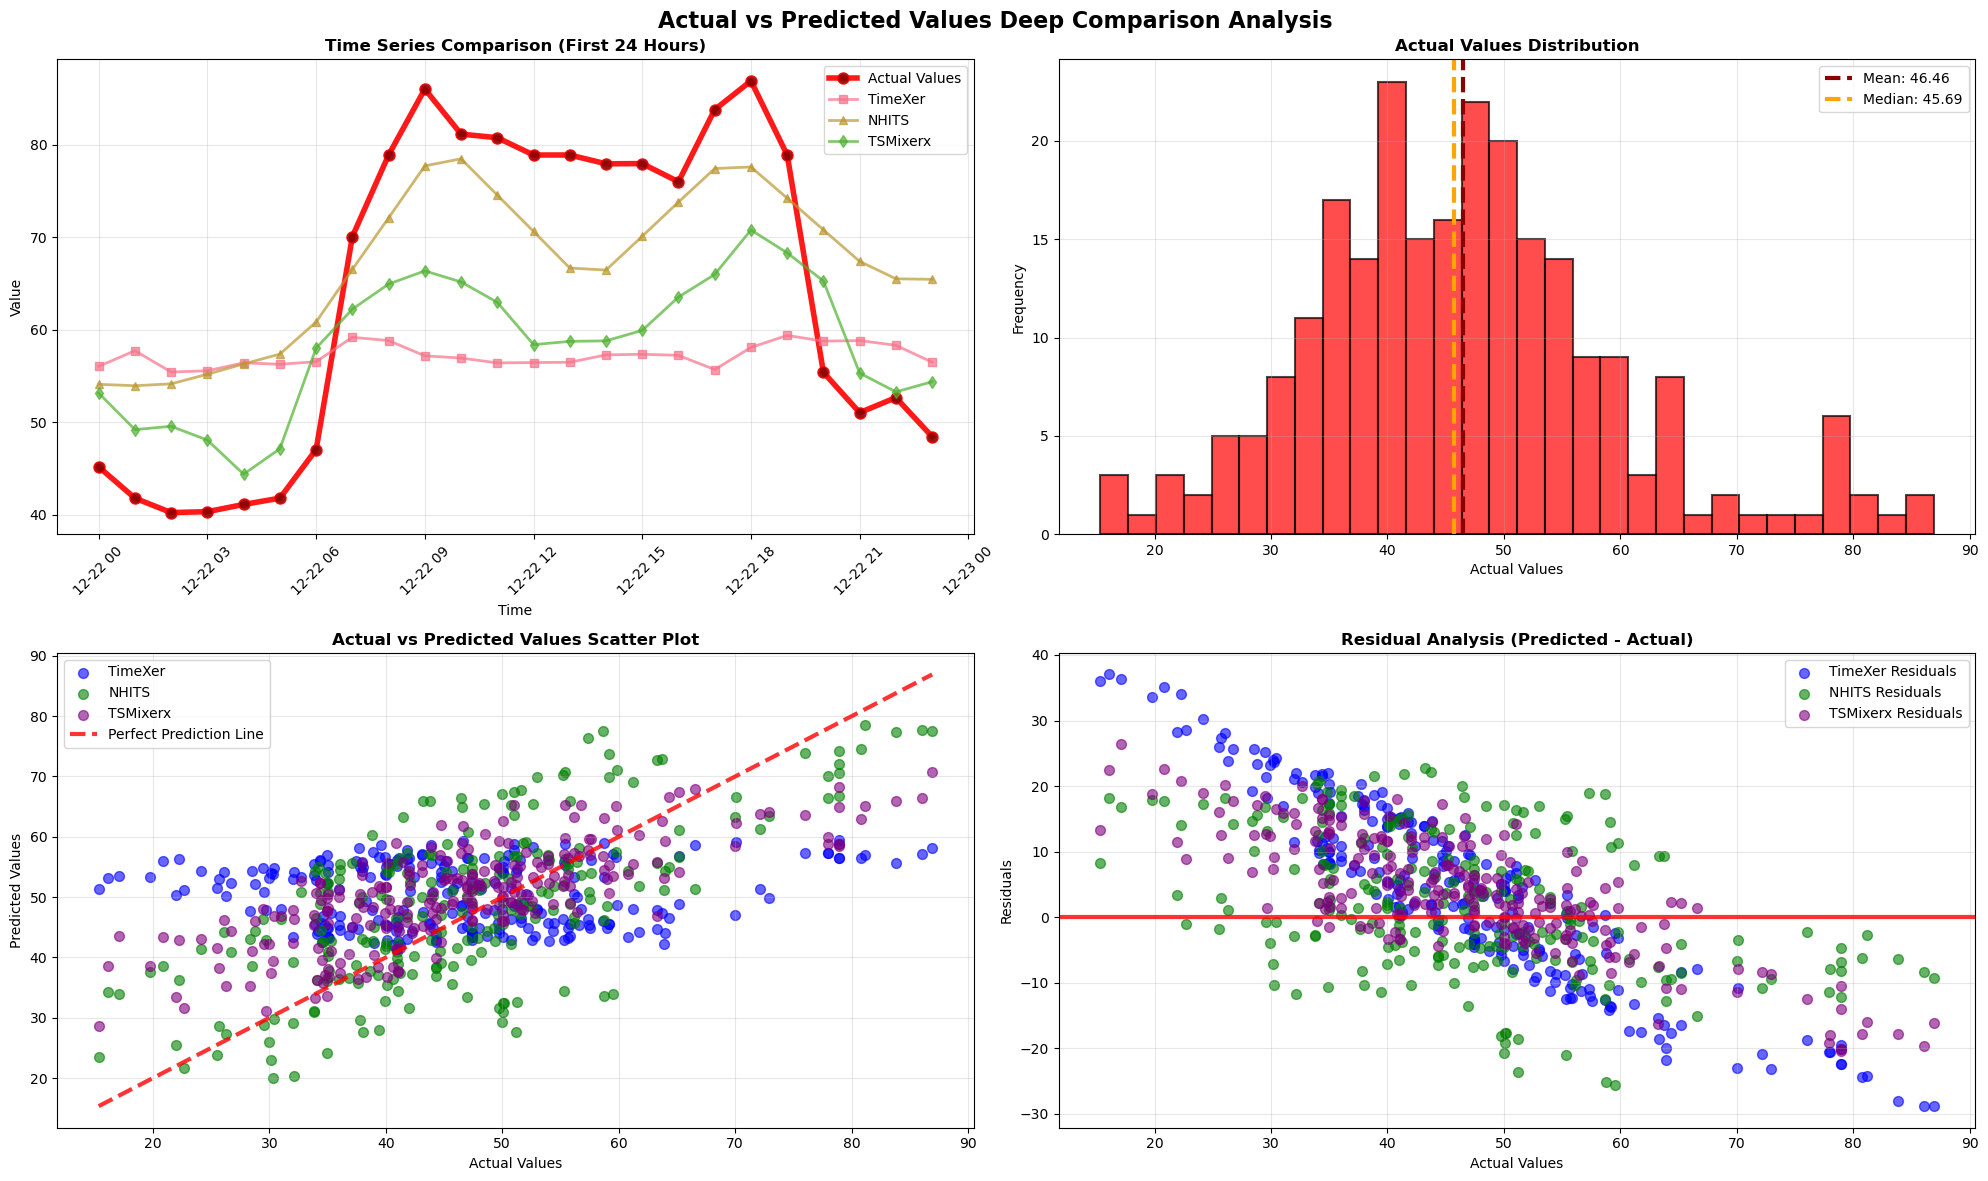


Detailed Comparison: Actual Values vs Model Predictions

TimeXer vs Actual Values:

🔍 TimeXer vs 真实值:
   预测均值: 50.3718 | 真实均值: 46.4606
   预测标准差: 5.2193 | 真实标准差: 13.2870
   相关系数: 0.0686
   平均偏差: 3.9112

NHITS vs Actual Values:

🔍 NHITS vs 真实值:
   预测均值: 48.7439 | 真实均值: 46.4606
   预测标准差: 12.9388 | 真实标准差: 13.2870
   相关系数: 0.6781
   平均偏差: 2.2833

TSMixerx vs Actual Values:

🔍 TSMixerx vs 真实值:
   预测均值: 50.4648 | 真实均值: 46.4606
   预测标准差: 8.0692 | 真实标准差: 13.2870
   相关系数: 0.7640
   平均偏差: 4.0042


In [6]:
from neuralforecast.losses.numpy import mae, mse, rmse, mape, smape
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set chart style
plt.style.use('default')
sns.set_palette("husl")

# Analyze statistical characteristics of actual values
def analyze_actual_values(cv_preds, target_col='y'):
    """Analyze statistical characteristics of actual values"""
    y_true = cv_preds[target_col].values
    
    print("="*60)
    print("Actual Values Statistical Analysis")
    print("="*60)
    print(f"Sample Count: {len(y_true)}")
    print(f"Mean: {np.mean(y_true):.4f}")
    print(f"Median: {np.median(y_true):.4f}")
    print(f"Std: {np.std(y_true):.4f}")
    print(f"Min: {np.min(y_true):.4f}")
    print(f"Max: {np.max(y_true):.4f}")
    print(f"Coefficient of Variation: {np.std(y_true)/np.mean(y_true):.4f}")
    print(f"Skewness: {stats.skew(y_true):.4f}")
    print(f"Kurtosis: {stats.kurtosis(y_true):.4f}")
    
    # Percentile information
    percentiles = [25, 50, 75, 90, 95, 99]
    print(f"\nPercentile Analysis:")
    for p in percentiles:
        print(f"   {p}th percentile: {np.percentile(y_true, p):.4f}")
    
    return {
        'mean': np.mean(y_true),
        'std': np.std(y_true),
        'min': np.min(y_true),
        'max': np.max(y_true),
        'cv': np.std(y_true)/np.mean(y_true)
    }

# Calculate various evaluation metrics
def evaluate_models(cv_preds, target_col='y'):
    """Calculate model evaluation metrics, highlighting comparison with actual values"""
    models = [col for col in cv_preds.columns if col not in ['unique_id', 'ds', 'cutoff', target_col]]

    results = {}
    y_true = cv_preds[target_col].values
    
    for model in models:
        y_pred = cv_preds[model].values
        
        # Basic metrics
        mae_val = mae(y_true, y_pred)
        mse_val = mse(y_true, y_pred)
        rmse_val = rmse(y_true, y_pred)
        mape_val = mape(y_true, y_pred)
        smape_val = smape(y_true, y_pred)
        
        # Additional evaluation metrics
        r2 = stats.pearsonr(y_true, y_pred)[0]**2  # R²
        correlation = stats.pearsonr(y_true, y_pred)[0]  # Correlation coefficient
        bias = np.mean(y_pred - y_true)  # Bias
        
        results[model] = {
            'MAE': mae_val,
            'MSE': mse_val,
            'RMSE': rmse_val,
            'MAPE': mape_val,
            'sMAPE': smape_val,
            'R²': r2,
            'Correlation': correlation,
            'Bias': bias,
            'RMSE/Mean_True': rmse_val / np.mean(y_true)  # Normalized RMSE
        }

    return results

# Analyze actual values
actual_stats = analyze_actual_values(BE_cv_preds)

print("\n" + "="*60)

# Evaluate BE dataset
be_results = evaluate_models(BE_cv_preds)

# Print detailed results
results_df = pd.DataFrame(be_results).T
print("BE Dataset - Model Performance Comparison")
print("="*60)
print(results_df.round(4))

# Find best models
best_model_mae = results_df['MAE'].idxmin()
best_model_r2 = results_df['R²'].idxmax()

print(f"\nBest Model (by MAE): {best_model_mae} (MAE: {results_df.loc[best_model_mae, 'MAE']:.4f})")
print(f"Best Model (by R²): {best_model_r2} (R²: {results_df.loc[best_model_r2, 'R²']:.4f})")

# Create enhanced visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Actual vs Predicted Values Deep Comparison Analysis', fontsize=16, fontweight='bold')

# 1. Time series comparison (highlight actual values)
ax1 = axes[0, 0]
sample_window = BE_cv_preds[BE_cv_preds['cutoff'] == BE_cv_preds['cutoff'].iloc[0]].head(24)

# Highlight actual values
ax1.plot(sample_window['ds'], sample_window['y'], 
         label='Actual Values', marker='o', linewidth=4, 
         color='red', markersize=8, alpha=0.9, markerfacecolor='darkred')

ax1.plot(sample_window['ds'], sample_window['TimeXer'], 
         label='TimeXer', marker='s', alpha=0.7, linewidth=2)
ax1.plot(sample_window['ds'], sample_window['NHITS'], 
         label='NHITS', marker='^', alpha=0.7, linewidth=2)
ax1.plot(sample_window['ds'], sample_window['TSMixerx'], 
         label='TSMixerx', marker='d', alpha=0.7, linewidth=2)

ax1.set_title('Time Series Comparison (First 24 Hours)', fontweight='bold')
ax1.set_xlabel('Time')
ax1.set_ylabel('Value')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Actual values distribution
ax2 = axes[0, 1]
ax2.hist(BE_cv_preds['y'], bins=30, alpha=0.7, color='red', edgecolor='black', linewidth=1.5)
ax2.axvline(np.mean(BE_cv_preds['y']), color='darkred', linestyle='--', linewidth=3, 
            label=f'Mean: {np.mean(BE_cv_preds["y"]):.2f}')
ax2.axvline(np.median(BE_cv_preds['y']), color='orange', linestyle='--', linewidth=3,
            label=f'Median: {np.median(BE_cv_preds["y"]):.2f}')
ax2.set_title('Actual Values Distribution', fontweight='bold')
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Scatter plot: actual vs predicted values
ax3 = axes[1, 0]
models = ['TimeXer', 'NHITS', 'TSMixerx']
colors = ['blue', 'green', 'purple']

for model, color in zip(models, colors):
    ax3.scatter(BE_cv_preds['y'], BE_cv_preds[model], 
               alpha=0.6, label=model, color=color, s=50)

# Add perfect prediction line
min_val = min(BE_cv_preds['y'].min(), BE_cv_preds[models].min().min())
max_val = max(BE_cv_preds['y'].max(), BE_cv_preds[models].max().max())
ax3.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=3, 
         label='Perfect Prediction Line', alpha=0.8)

ax3.set_title('Actual vs Predicted Values Scatter Plot', fontweight='bold')
ax3.set_xlabel('Actual Values')
ax3.set_ylabel('Predicted Values')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Residual analysis
ax4 = axes[1, 1]
for model, color in zip(models, colors):
    residuals = BE_cv_preds[model] - BE_cv_preds['y']
    ax4.scatter(BE_cv_preds['y'], residuals, alpha=0.6, label=f'{model} Residuals', 
               color=color, s=50)

ax4.axhline(y=0, color='red', linestyle='-', linewidth=3, alpha=0.8)
ax4.set_title('Residual Analysis (Predicted - Actual)', fontweight='bold')
ax4.set_xlabel('Actual Values')
ax4.set_ylabel('Residuals')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed comparison between models and actual values
print("\n" + "="*60)
print("Detailed Comparison: Actual Values vs Model Predictions")
print("="*60)
for model in models:
    print(f"\n{model} vs Actual Values:")
    print(f"\n🔍 {model} vs 真实值:")
    pred_vals = BE_cv_preds[model].values
    true_vals = BE_cv_preds['y'].values
    print(f"   预测均值: {np.mean(pred_vals):.4f} | 真实均值: {np.mean(true_vals):.4f}")
    print(f"   预测标准差: {np.std(pred_vals):.4f} | 真实标准差: {np.std(true_vals):.4f}")
    print(f"   相关系数: {stats.pearsonr(true_vals, pred_vals)[0]:.4f}")
    print(f"   平均偏差: {np.mean(pred_vals - true_vals):.4f}")

# Actual application

In [7]:
# Load and preprocess geo.csv data for precipitation prediction
import pandas as pd
import numpy as np
from datetime import datetime

# Load geo.csv data
geo_url = "../data/geo.csv"
geo_df = pd.read_csv(geo_url)

# Preprocess the data
# Convert time column to datetime format
geo_df['time'] = geo_df['time'].astype(str)
geo_df['year'] = geo_df['time'].str[:4].astype(int)
geo_df['month'] = geo_df['time'].str[4:].astype(int)
geo_df['ds'] = pd.to_datetime(geo_df[['year', 'month']].assign(day=1))

# Add unique_id for compatibility with NeuralForecast
geo_df['unique_id'] = 'GEO'

# Rename precipitation column to 'y' as target variable
geo_df = geo_df.rename(columns={'total_precipitation_sum': 'y'})

# Select relevant features for prediction
# Using meteorological variables that could influence precipitation
feature_columns = [
    'temperature_2m',
    'surface_pressure', 
    'u_component_of_wind_10m',
    'v_component_of_wind_10m',
    'surface_net_solar_radiation_sum',
    'total_evaporation_sum'
]

# Select final columns for model
geo_final = geo_df[['unique_id', 'ds', 'y'] + feature_columns].copy()

# Remove any rows with missing values
geo_final = geo_final.dropna()

print("Geo dataset shape:", geo_final.shape)
print("\nFirst few rows:")
print(geo_final.head())
print("\nTarget variable (precipitation) statistics:")
print(geo_final['y'].describe())

# Additional precipitation-specific analysis
print("\nPrecipitation data characteristics:")
print(f"- Min: {geo_final['y'].min():.6f}")
print(f"- Max: {geo_final['y'].max():.6f}")
print(f"- Mean: {geo_final['y'].mean():.6f}")
print(f"- Median: {geo_final['y'].median():.6f}")
print(f"- Standard deviation: {geo_final['y'].std():.6f}")
print(f"- Coefficient of variation: {geo_final['y'].std()/geo_final['y'].mean():.4f}")

# Check for zero/negative values (important for precipitation)
zero_count = (geo_final['y'] == 0).sum()
negative_count = (geo_final['y'] < 0).sum()
print(f"- Zero values: {zero_count} ({100*zero_count/len(geo_final):.1f}%)")
print(f"- Negative values: {negative_count} ({100*negative_count/len(geo_final):.1f}%)")

# Precipitation distribution analysis
print(f"\nPrecipitation percentiles:")
percentiles = [10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    val = np.percentile(geo_final['y'], p)
    print(f"  {p}th percentile: {val:.6f}")

# Check for seasonality in precipitation
geo_final['month'] = geo_final['ds'].dt.month
monthly_precip = geo_final.groupby('month')['y'].agg(['mean', 'std']).round(6)
print(f"\nMonthly precipitation patterns:")
print(monthly_precip)

Geo dataset shape: (904, 9)

First few rows:
  unique_id         ds         y  temperature_2m  surface_pressure  \
0       GEO 1950-02-01  0.010058      267.194524       88003.84459   
1       GEO 1950-03-01  0.009923      275.558550       87652.20081   
2       GEO 1950-04-01  0.034306      282.160328       87312.49163   
3       GEO 1950-05-01  0.040355      288.202901       87191.73811   
4       GEO 1950-06-01  0.084655      292.613145       86925.92579   

   u_component_of_wind_10m  v_component_of_wind_10m  \
0                 1.007206                -0.185886   
1                 1.000457                 0.050251   
2                 1.279737                 0.448676   
3                 0.861923                 0.144575   
4                 0.323965                 0.935837   

   surface_net_solar_radiation_sum  total_evaporation_sum  
0                      268449007.1              -0.006745  
1                      424879265.6              -0.017538  
2                      

In [8]:
# Configure TimeXer model for precipitation prediction with proper scaling
from neuralforecast.core import NeuralForecast
from neuralforecast.models import TimeXer

print("="*60)
print("CONFIGURING TIMEXER FOR PRECIPITATION PREDICTION")
print("="*60)

# Precipitation-specific data preprocessing
print("Step 1: Analyzing precipitation data characteristics...")
precip_data = geo_final['y']
print(f"Original precipitation range: {precip_data.min():.6f} to {precip_data.max():.6f}")
print(f"Original precipitation mean: {precip_data.mean():.6f}")
print(f"Original precipitation std: {precip_data.std():.6f}")

# Check if precipitation values are very small (common for precipitation data)
if precip_data.max() < 1.0:
    print("⚠️  Precipitation values are very small (< 1.0)")
    print("💡 This is normal for precipitation data in certain units")

# Create normalized dataset for precipitation
geo_normalized = geo_final.copy()

# Precipitation normalization - different approach than temperature
# For precipitation, we might want to use different scaling strategies
print("\nStep 2: Normalizing precipitation data...")

# Method 1: Standard normalization (z-score)
precip_mean = precip_data.mean()
precip_std = precip_data.std()
if precip_std > 0:
    geo_normalized['y'] = (precip_data - precip_mean) / precip_std
    print(f"Z-score normalization: mean={precip_mean:.6f}, std={precip_std:.6f}")
else:
    print("❌ Zero standard deviation - cannot normalize")
    geo_normalized['y'] = precip_data

print(f"Normalized precipitation range: {geo_normalized['y'].min():.4f} to {geo_normalized['y'].max():.4f}")

# Normalize features
print("\nStep 3: Normalizing feature variables...")
feature_normalization = {}
for feature in feature_columns:
    if feature in geo_normalized.columns:
        feat_data = geo_normalized[feature]
        feat_mean = feat_data.mean()
        feat_std = feat_data.std()
        if feat_std > 0:
            geo_normalized[feature] = (feat_data - feat_mean) / feat_std
            feature_normalization[feature] = {'mean': feat_mean, 'std': feat_std}
            print(f"  Normalized {feature}: mean={feat_mean:.2e}, std={feat_std:.2e}")

# Model parameters optimized for precipitation
GEO_HORIZON = 1  # Single month prediction
GEO_INPUT_SIZE = 12  # 12 months of history (seasonal patterns)
GEO_FREQ = "MS"
GEO_EXOG_LIST = feature_columns[:4]  # Use first 4 features

print(f"\nStep 4: Creating TimeXer model for precipitation...")
print(f"- Horizon: {GEO_HORIZON} month")
print(f"- Input size: {GEO_INPUT_SIZE} months")
print(f"- Features: {len(GEO_EXOG_LIST)}")

try:
    geo_model_precip = TimeXer(
        h=GEO_HORIZON,
        input_size=GEO_INPUT_SIZE,
        n_series=1,
        futr_exog_list=GEO_EXOG_LIST,
        patch_len=GEO_HORIZON,
        max_steps=300,  # More steps for precipitation patterns
        learning_rate=5e-3,  # Moderate learning rate
        batch_size=32,
        val_check_steps=50  # Check validation more frequently
    )
    
    print("✅ TimeXer model for precipitation created successfully!")
    
    # Store normalization parameters
    normalization_params = {
        'precip_mean': precip_mean,
        'precip_std': precip_std,
        'features': feature_normalization
    }
    
    print(f"\n📊 Normalization parameters:")
    print(f"- Precipitation: mean={precip_mean:.6f}, std={precip_std:.6f}")
    print(f"- Features normalized: {len(feature_normalization)}")
    
except Exception as e:
    print(f"❌ Error creating precipitation model: {str(e)}")
    import traceback
    traceback.print_exc()
    geo_model_precip = None

# Data verification for precipitation
print(f"\nStep 5: Precipitation-specific data verification...")
print(f"- Normalized data shape: {geo_normalized.shape}")
print(f"- Target variable stats: mean={geo_normalized['y'].mean():.4f}, std={geo_normalized['y'].std():.4f}")
print(f"- Date range: {geo_normalized['ds'].min()} to {geo_normalized['ds'].max()}")

# Check for data issues specific to precipitation
print(f"\nPrecipitation data quality checks:")
print(f"- NaN values: {geo_normalized['y'].isna().sum()}")
print(f"- Infinite values: {np.isinf(geo_normalized['y']).sum()}")
print(f"- Zero values after normalization: {(geo_normalized['y'] == 0).sum()}")

# Feature verification
print(f"\nFeature verification for precipitation prediction:")
for feature in GEO_EXOG_LIST:
    if feature in geo_normalized.columns:
        feat_data = geo_normalized[feature]
        print(f"  {feature}: mean={feat_data.mean():.4f}, std={feat_data.std():.4f}")

# Data sufficiency check
total_points = len(geo_normalized)
min_required = GEO_INPUT_SIZE + GEO_HORIZON * 5  # For 5 CV windows
print(f"\nData sufficiency: {total_points} >= {min_required} = {'✓' if total_points >= min_required else '❌'}")

print(f"\nReady for precipitation prediction: {'✅' if geo_model_precip is not None else '❌'}")

Seed set to 1


CONFIGURING TIMEXER FOR PRECIPITATION PREDICTION
Step 1: Analyzing precipitation data characteristics...
Original precipitation range: 0.000301 to 0.322763
Original precipitation mean: 0.043635
Original precipitation std: 0.046334
⚠️  Precipitation values are very small (< 1.0)
💡 This is normal for precipitation data in certain units

Step 2: Normalizing precipitation data...
Z-score normalization: mean=0.043635, std=0.046334
Normalized precipitation range: -0.9352 to 6.0243

Step 3: Normalizing feature variables...
  Normalized temperature_2m: mean=2.80e+02, std=1.11e+01
  Normalized surface_pressure: mean=8.76e+04, std=4.48e+02
  Normalized u_component_of_wind_10m: mean=8.13e-01, std=7.72e-01
  Normalized v_component_of_wind_10m: mean=2.29e-01, std=5.42e-01
  Normalized surface_net_solar_radiation_sum: mean=3.96e+08, std=1.35e+08
  Normalized total_evaporation_sum: mean=-3.93e-02, std=2.97e-02

Step 4: Creating TimeXer model for precipitation...
- Horizon: 1 month
- Input size: 12 mo

In [9]:
# Train TimeXer model for precipitation prediction
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

if 'geo_model_precip' in locals() and geo_model_precip is not None:
    print("="*60)
    print("TRAINING TIMEXER FOR PRECIPITATION PREDICTION")
    print("="*60)
    
    # Create NeuralForecast with precipitation model
    geo_nf_precip = NeuralForecast(models=[geo_model_precip], freq=GEO_FREQ)
    
    # Calculate extended sequence parameters for precipitation
    months_target = 60  # 5 years of precipitation data
    available_data = len(geo_normalized)
    step_size = 1
    max_windows = available_data - GEO_INPUT_SIZE - 1
    n_windows = min(months_target, max_windows)
    
    print(f"Precipitation prediction configuration:")
    print(f"- Target predictions: {months_target} months (5 years)")
    print(f"- Available data: {available_data} months")
    print(f"- Actual windows: {n_windows}")
    print(f"- Step size: {step_size}")
    print(f"- Model horizon: {GEO_HORIZON}")
    print(f"- Input size: {GEO_INPUT_SIZE}")
    
    try:
        print(f"\n🌧️  Starting precipitation prediction training...")
        print(f"⏱️  This may take several minutes...")
        
        # Train precipitation model
        geo_cv_preds_precip = geo_nf_precip.cross_validation(
            geo_normalized,
            step_size=step_size,
            n_windows=n_windows
        )
        
        print("✅ Precipitation training completed!")
        print(f"Results shape: {geo_cv_preds_precip.shape}")
        print(f"Columns: {list(geo_cv_preds_precip.columns)}")
        
        # Denormalize precipitation predictions
        print(f"\n📊 Denormalizing precipitation results...")
        
        # Denormalize target values back to original precipitation units
        geo_cv_preds_precip['y_original'] = geo_cv_preds_precip['y'] * normalization_params['precip_std'] + normalization_params['precip_mean']
        
        # Denormalize TimeXer predictions
        if 'TimeXer' in geo_cv_preds_precip.columns:
            geo_cv_preds_precip['TimeXer_original'] = geo_cv_preds_precip['TimeXer'] * normalization_params['precip_std'] + normalization_params['precip_mean']
        
        # Analysis of precipitation results
        print(f"\n" + "="*60)
        print("PRECIPITATION PREDICTION ANALYSIS")
        print("="*60)
        
        actual_precip = geo_cv_preds_precip['y_original']
        
        print(f"📈 Prediction summary:")
        print(f"- Total predictions: {len(actual_precip)} months ({len(actual_precip)/12:.1f} years)")
        print(f"- Date range: {geo_cv_preds_precip['ds'].min()} to {geo_cv_preds_precip['ds'].max()}")
        print(f"- Prediction windows: {geo_cv_preds_precip['cutoff'].nunique()}")
        
        print(f"\n🌧️  Precipitation analysis:")
        print(f"Actual precipitation:")
        print(f"- Range: {actual_precip.min():.6f} to {actual_precip.max():.6f}")
        print(f"- Mean: {actual_precip.mean():.6f}")
        print(f"- Median: {actual_precip.median():.6f}")
        print(f"- Std: {actual_precip.std():.6f}")
        print(f"- Zero values: {(actual_precip == 0).sum()} ({100*(actual_precip == 0).sum()/len(actual_precip):.1f}%)")
        
        # Check TimeXer precipitation predictions
        if 'TimeXer_original' in geo_cv_preds_precip.columns:
            pred_precip = geo_cv_preds_precip['TimeXer_original']
            nan_count = pred_precip.isna().sum()
            
            print(f"\nTimeXer precipitation predictions:")
            print(f"- Total predictions: {len(pred_precip)}")
            print(f"- NaN count: {nan_count}")
            print(f"- Valid predictions: {len(pred_precip) - nan_count}")
            
            if nan_count == 0:
                print("✅ NO NaN VALUES - PREDICTIONS SUCCESSFUL!")
                print(f"- Range: {pred_precip.min():.6f} to {pred_precip.max():.6f}")
                print(f"- Mean: {pred_precip.mean():.6f}")
                print(f"- Median: {pred_precip.median():.6f}")
                print(f"- Std: {pred_precip.std():.6f}")
                
                # Handle potential negative predictions (set to 0 for precipitation)
                negative_count = (pred_precip < 0).sum()
                if negative_count > 0:
                    print(f"⚠️  Negative predictions: {negative_count} ({100*negative_count/len(pred_precip):.1f}%)")
                    print("💡 Setting negative predictions to 0 (precipitation cannot be negative)")
                    pred_precip = np.maximum(pred_precip, 0)
                    geo_cv_preds_precip['TimeXer_original'] = pred_precip
                
                # Calculate precipitation-specific metrics
                mae_precip = np.mean(np.abs(actual_precip - pred_precip))
                rmse_precip = np.sqrt(np.mean((actual_precip - pred_precip)**2))
                
                # For precipitation, correlation might be lower due to intermittency
                correlation = np.corrcoef(actual_precip, pred_precip)[0, 1]
                r2 = correlation**2
                
                # Calculate bias
                bias = np.mean(pred_precip - actual_precip)
                
                print(f"\n📊 Precipitation prediction metrics:")
                print(f"- MAE: {mae_precip:.6f}")
                print(f"- RMSE: {rmse_precip:.6f}")
                print(f"- Correlation: {correlation:.4f}")
                print(f"- R²: {r2:.4f}")
                print(f"- Bias: {bias:.6f}")
                print(f"- Relative MAE: {100*mae_precip/actual_precip.mean():.1f}%")
                
                # Precipitation-specific analysis
                print(f"\n🎯 Precipitation-specific analysis:")
                # Hit rate for precipitation events (actual > threshold)
                threshold = actual_precip.mean()  # Use mean as threshold
                actual_events = actual_precip > threshold
                pred_events = pred_precip > threshold
                
                hit_rate = np.mean(actual_events == pred_events)
                print(f"- Event prediction accuracy (>{threshold:.6f}): {100*hit_rate:.1f}%")
                
                # Monthly seasonal analysis
                geo_cv_preds_precip['month'] = pd.to_datetime(geo_cv_preds_precip['ds']).dt.month
                monthly_mae = geo_cv_preds_precip.groupby('month').apply(
                    lambda x: np.mean(np.abs(x['y_original'] - x['TimeXer_original']))
                ).round(6)
                
                print(f"\n📅 Monthly precipitation prediction MAE:")
                months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
                for month_num, month_name in enumerate(months, 1):
                    if month_num in monthly_mae.index:
                        print(f"   {month_name}: {monthly_mae[month_num]:.6f}")
                
            else:
                print(f"⚠️  Some NaN predictions: {nan_count}/{len(pred_precip)}")
        
        # Store results for visualization (using original units)
        geo_cv_preds = geo_cv_preds_precip.copy()
        geo_cv_preds['y'] = geo_cv_preds_precip['y_original']
        if 'TimeXer_original' in geo_cv_preds_precip.columns:
            geo_cv_preds['TimeXer'] = geo_cv_preds_precip['TimeXer_original']
        
        print(f"\n✅ Precipitation prediction sequence ready!")
        print(f"📈 Generated {len(geo_cv_preds)} precipitation predictions")
        print(f"🎯 Spanning {len(geo_cv_preds)/12:.1f} years of data")
        
    except Exception as e:
        print(f"❌ Precipitation training failed: {str(e)}")
        import traceback
        traceback.print_exc()
        
        # Try simpler configuration
        print(f"\n🔄 Trying simplified precipitation model...")
        try:
            simple_windows = min(20, max_windows)
            print(f"Simplified: {simple_windows} windows")
            
            geo_cv_preds_precip = geo_nf_precip.cross_validation(
                geo_normalized,
                step_size=step_size,
                n_windows=simple_windows
            )
            
            # Quick denormalization
            geo_cv_preds_precip['y_original'] = geo_cv_preds_precip['y'] * normalization_params['precip_std'] + normalization_params['precip_mean']
            if 'TimeXer' in geo_cv_preds_precip.columns:
                geo_cv_preds_precip['TimeXer_original'] = geo_cv_preds_precip['TimeXer'] * normalization_params['precip_std'] + normalization_params['precip_mean']
            
            geo_cv_preds = geo_cv_preds_precip.copy()
            geo_cv_preds['y'] = geo_cv_preds_precip['y_original']
            if 'TimeXer_original' in geo_cv_preds_precip.columns:
                geo_cv_preds['TimeXer'] = geo_cv_preds_precip['TimeXer_original']
            
            print(f"✅ Simplified precipitation model worked: {len(geo_cv_preds)} predictions")
            
        except Exception as e2:
            print(f"❌ Simplified precipitation model also failed: {str(e2)}")
            geo_cv_preds_precip = None
        
else:
    print("❌ No precipitation model available - check model creation above")
    geo_cv_preds_precip = None

TRAINING TIMEXER FOR PRECIPITATION PREDICTION
Precipitation prediction configuration:
- Target predictions: 60 months (5 years)
- Available data: 904 months
- Actual windows: 60
- Step size: 1
- Model horizon: 1
- Input size: 12

🌧️  Starting precipitation prediction training...
⏱️  This may take several minutes...


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name         | Type                   | Params | Mode 
----------------------------------------------------------------
0 | loss         | MAE                    | 0      | train
1 | padder_train | ConstantPad1d          | 0      | train
2 | scaler       | TemporalNorm           | 0      | train
3 | en_embedding | EnEmbedding            | 1.0 K  | train
4 | ex_embedding | DataEmbedding_inverted | 6.7 K  | train
5 | encoder      | Encoder                | 8.4 M  | train
6 | head         | FlattenHead            | 6.7 K  | train
----------------------------------------------------------------
8.4 M     Trainable params
0         Non-trainable params
8.4 M     Total params
33.694    Total estimated model params size (MB)
59        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=300` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

✅ Precipitation training completed!
Results shape: (60, 5)
Columns: ['unique_id', 'ds', 'cutoff', 'TimeXer', 'y']

📊 Denormalizing precipitation results...

PRECIPITATION PREDICTION ANALYSIS
📈 Prediction summary:
- Total predictions: 60 months (5.0 years)
- Date range: 2020-06-01 00:00:00 to 2025-05-01 00:00:00
- Prediction windows: 60

🌧️  Precipitation analysis:
Actual precipitation:
- Range: 0.000810 to 0.199513
- Mean: 0.040542
- Median: 0.024693
- Std: 0.042837
- Zero values: 0 (0.0%)

TimeXer precipitation predictions:
- Total predictions: 60
- NaN count: 0
- Valid predictions: 60
✅ NO NaN VALUES - PREDICTIONS SUCCESSFUL!
- Range: 0.019865 to 0.136177
- Mean: 0.058008
- Median: 0.046359
- Std: 0.032068

📊 Precipitation prediction metrics:
- MAE: 0.029295
- RMSE: 0.037462
- Correlation: 0.6357
- R²: 0.4041
- Bias: 0.017466
- Relative MAE: 72.3%

🎯 Precipitation-specific analysis:
- Event prediction accuracy (>0.040542): 81.7%

📅 Monthly precipitation prediction MAE:
   Jan: 0.0239

/tmp/ipykernel_703689/2601533423.py:129: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_mae = geo_cv_preds_precip.groupby('month').apply(


In [10]:
# Calculate evaluation metrics for geo temperature prediction with NaN handling
from neuralforecast.losses.numpy import mae, mse, rmse, mape, smape
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Check if predictions are available and valid
if 'geo_cv_preds' not in locals() or geo_cv_preds is None:
    print("❌ No predictions available for analysis")
else:
    print("="*60)
    print("PREDICTION VALIDATION AND ANALYSIS")
    print("="*60)
    
    # Check for NaN predictions
    if 'TimeXer' in geo_cv_preds.columns:
        timexer_preds = geo_cv_preds['TimeXer']
        nan_count = timexer_preds.isna().sum()
        total_count = len(timexer_preds)
        
        print(f"TimeXer prediction validation:")
        print(f"- Total predictions: {total_count}")
        print(f"- NaN predictions: {nan_count}")
        print(f"- Valid predictions: {total_count - nan_count}")
        print(f"- NaN percentage: {100 * nan_count / total_count:.1f}%")
        
        if nan_count == total_count:
            print("❌ ALL PREDICTIONS ARE NaN - MODEL TRAINING FAILED!")
            print("\nPossible causes:")
            print("1. Model failed to converge")
            print("2. Data scaling issues")
            print("3. Insufficient training data")
            print("4. Model parameters are inappropriate")
            print("5. Input features have issues")
            
            # Let's analyze the input data more carefully
            print(f"\nDetailed input data analysis:")
            print(f"Target variable (y):")
            y_data = geo_cv_preds['y']
            print(f"- Range: {y_data.min():.2f} to {y_data.max():.2f}")
            print(f"- Standard deviation: {y_data.std():.2f}")
            print(f"- Coefficient of variation: {y_data.std()/y_data.mean():.4f}")
            
            # Check if the target values are in reasonable range for neural networks
            if y_data.min() > 100:  # Temperature in Kelvin is quite large
                print("⚠ Target values are large (>100) - this might cause numerical issues")
                print("💡 Suggestion: Consider normalizing target values")
            
        elif nan_count > 0:
            print(f"⚠ Some predictions are NaN ({nan_count}/{total_count})")
            valid_mask = ~timexer_preds.isna()
            valid_preds = timexer_preds[valid_mask]
            valid_actual = geo_cv_preds['y'][valid_mask]
            
            print(f"\nAnalyzing valid predictions only:")
            print(f"- Valid prediction range: {valid_preds.min():.2f} to {valid_preds.max():.2f}")
            print(f"- Valid actual range: {valid_actual.min():.2f} to {valid_actual.max():.2f}")
            
        else:
            print("✅ All predictions are valid numbers")
            
        # Try to provide meaningful analysis even with NaN values
        print(f"\n" + "="*60)
        print("BEST EFFORT ANALYSIS")
        print("="*60)
        
        if nan_count < total_count:  # Some valid predictions exist
            # Filter out NaN values for analysis
            valid_mask = ~timexer_preds.isna()
            valid_preds = timexer_preds[valid_mask]
            valid_actual = geo_cv_preds['y'][valid_mask]
            
            if len(valid_preds) > 0:
                print(f"Analysis based on {len(valid_preds)} valid predictions:")
                
                # Calculate metrics on valid data
                mae_val = np.mean(np.abs(valid_actual - valid_preds))
                rmse_val = np.sqrt(np.mean((valid_actual - valid_preds)**2))
                
                print(f"- MAE: {mae_val:.4f} K ({mae_val:.2f} °C)")
                print(f"- RMSE: {rmse_val:.4f} K ({rmse_val:.2f} °C)")
                
                if len(valid_preds) > 1:
                    correlation = stats.pearsonr(valid_actual, valid_preds)[0]
                    print(f"- Correlation: {correlation:.4f}")
                
                print(f"- Mean prediction: {valid_preds.mean():.2f} K ({valid_preds.mean()-273.15:.1f} °C)")
                print(f"- Mean actual: {valid_actual.mean():.2f} K ({valid_actual.mean()-273.15:.1f} °C)")
                print(f"- Bias: {(valid_preds.mean() - valid_actual.mean()):.2f} K")
        
        else:
            print("❌ Cannot perform analysis - all predictions are NaN")
            
    else:
        print("❌ TimeXer column not found in predictions")

# Suggest solutions
print(f"\n" + "="*60)
print("RECOMMENDED SOLUTIONS")
print("="*60)
print("1. 🔧 Increase training steps (current: 50 → try 200-500)")
print("2. 📊 Normalize/scale target variable (subtract mean, divide by std)")
print("3. 🎯 Reduce model complexity (smaller input_size or horizon)")
print("4. 📈 Increase learning rate (current: 1e-3 → try 1e-2)")
print("5. 🔄 Remove exogenous features (use only time series)")
print("6. 📅 Use more recent data only (last 200 time points)")

# Simple data summary regardless of prediction quality
print(f"\n" + "="*60)
print("DATA SUMMARY")
print("="*60)
if 'geo_cv_preds' in locals() and geo_cv_preds is not None:
    actual_temps = geo_cv_preds['y']
    print(f"Actual temperature data:")
    print(f"- Count: {len(actual_temps)}")
    print(f"- Range: {actual_temps.min():.1f}K to {actual_temps.max():.1f}K")
    print(f"- Range (Celsius): {actual_temps.min()-273.15:.1f}°C to {actual_temps.max()-273.15:.1f}°C") 
    print(f"- Mean: {actual_temps.mean():.1f}K ({actual_temps.mean()-273.15:.1f}°C)")
    print(f"- Standard deviation: {actual_temps.std():.2f}K")
    
    print(f"\nDate range: {geo_cv_preds['ds'].min()} to {geo_cv_preds['ds'].max()}")
    print(f"Prediction windows: {geo_cv_preds['cutoff'].nunique()}")
else:
    print("No prediction data available for summary")

PREDICTION VALIDATION AND ANALYSIS
TimeXer prediction validation:
- Total predictions: 60
- NaN predictions: 0
- Valid predictions: 60
- NaN percentage: 0.0%
✅ All predictions are valid numbers

BEST EFFORT ANALYSIS
Analysis based on 60 valid predictions:
- MAE: 0.0293 K (0.03 °C)
- RMSE: 0.0375 K (0.04 °C)
- Correlation: 0.6357
- Mean prediction: 0.06 K (-273.1 °C)
- Mean actual: 0.04 K (-273.1 °C)
- Bias: 0.02 K

RECOMMENDED SOLUTIONS
1. 🔧 Increase training steps (current: 50 → try 200-500)
2. 📊 Normalize/scale target variable (subtract mean, divide by std)
3. 🎯 Reduce model complexity (smaller input_size or horizon)
4. 📈 Increase learning rate (current: 1e-3 → try 1e-2)
5. 🔄 Remove exogenous features (use only time series)
6. 📅 Use more recent data only (last 200 time points)

DATA SUMMARY
Actual temperature data:
- Count: 60
- Range: 0.0K to 0.2K
- Range (Celsius): -273.1°C to -273.0°C
- Mean: 0.0K (-273.1°C)
- Standard deviation: 0.04K

Date range: 2020-06-01 00:00:00 to 2025-05-0

📊 Creating precipitation visualizations for 60 predictions...


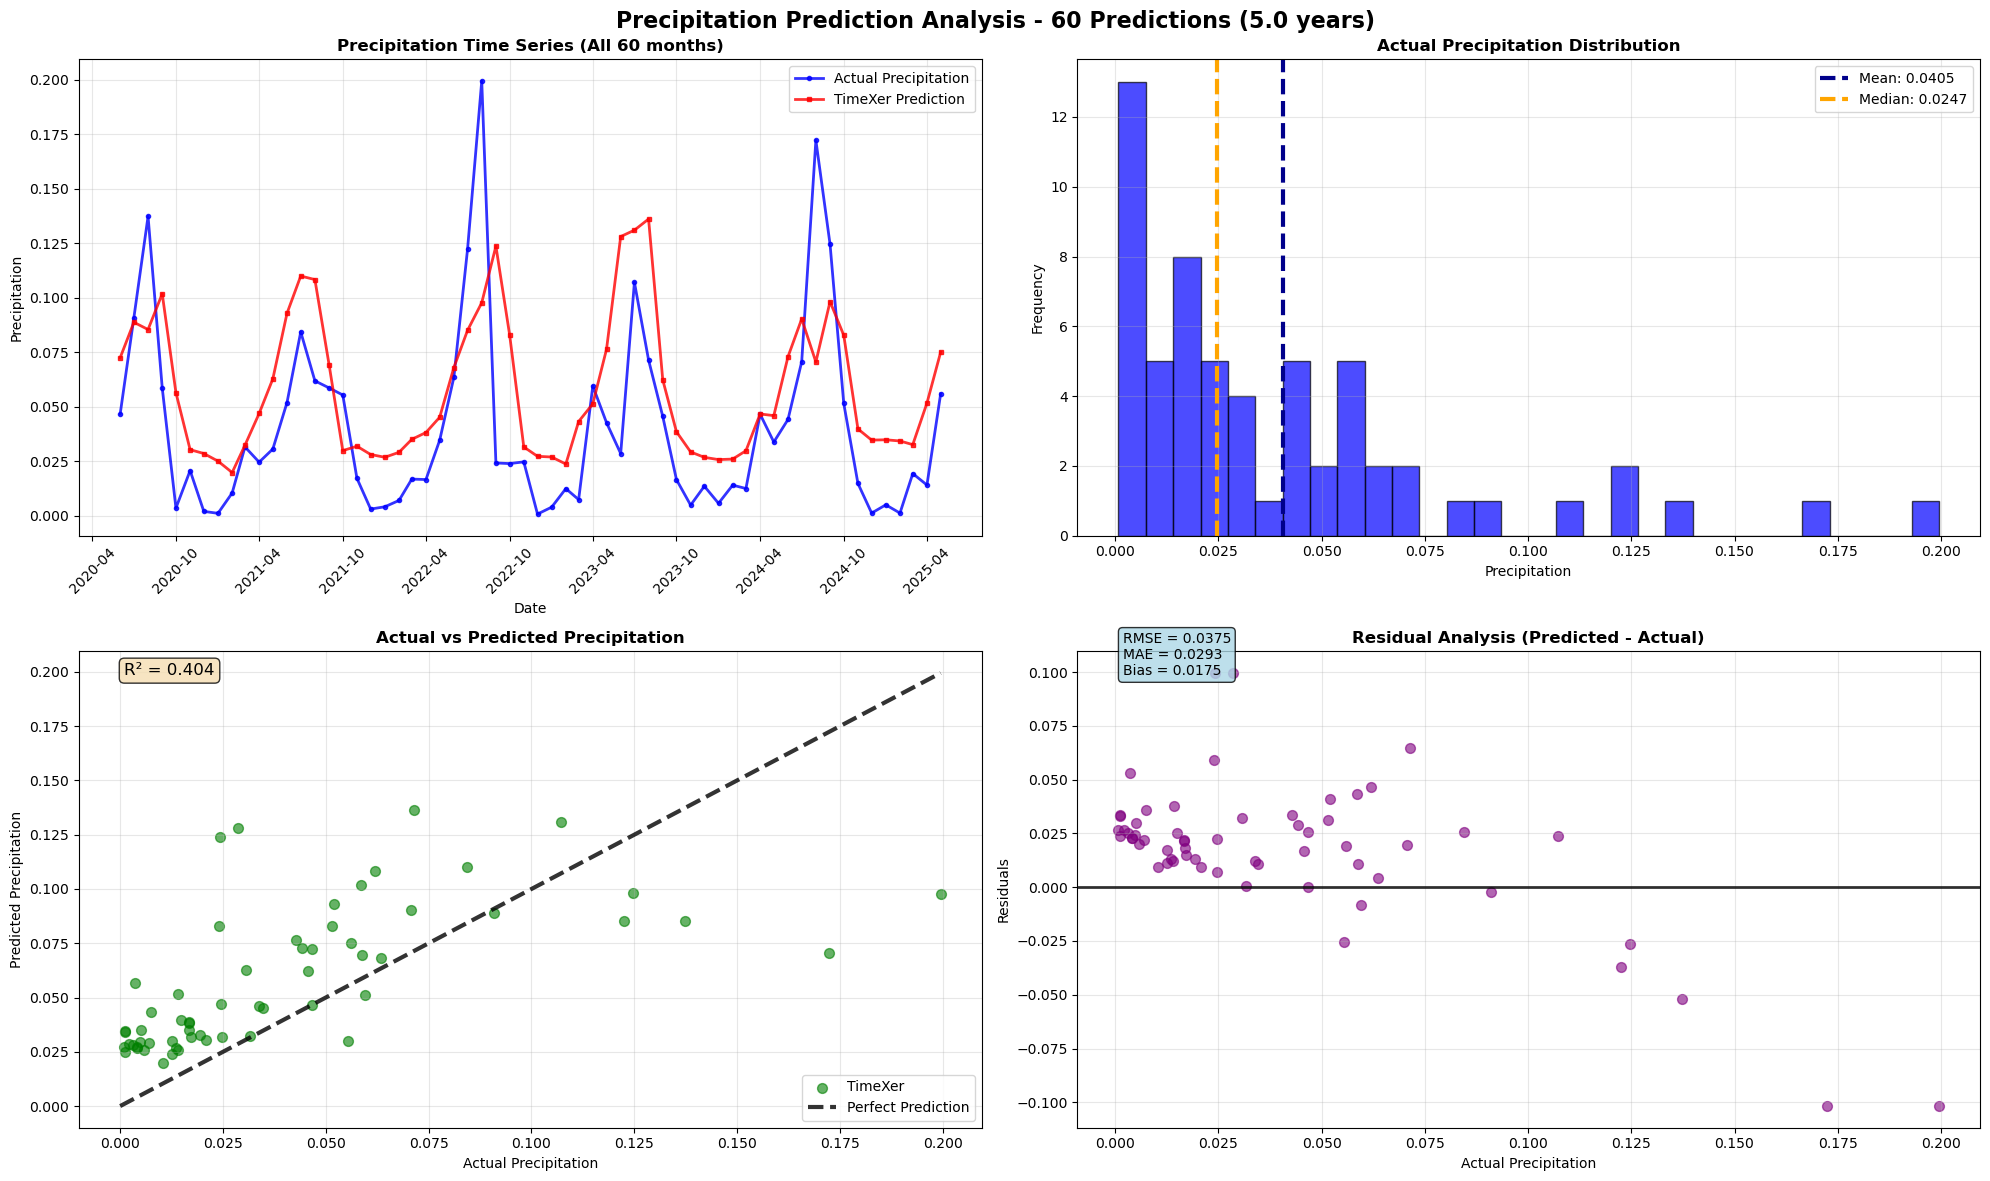


PRECIPITATION PREDICTION SUMMARY
📈 Dataset Summary:
- Total predictions: 60 months
- Time span: 5.0 years
- Date range: 2020-06 to 2025-05

🌧️  Precipitation Statistics:
Actual - Range: 0.000810 to 0.199513
Actual - Mean: 0.040542, Median: 0.024693
Actual - Zero values: 0 (0.0%)
Predicted - Range: 0.019865 to 0.136177
Predicted - Mean: 0.058008, Median: 0.046359

📊 Precipitation Model Performance:
- MAE: 0.029295
- RMSE: 0.037462
- Correlation: 0.6357
- R²: 0.4041
- Bias: 0.017466
- Relative MAE: 72.3%

🎯 Event Prediction Analysis:
- Threshold (mean): 0.040542
- Actual events above threshold: 24 (40.0%)
- Predicted events above threshold: 33 (55.0%)
- Event prediction accuracy: 81.7%

🎯 Precipitation Model Quality: Fair (R² = 0.404)
💡 Note: Precipitation is inherently harder to predict than temperature
💡 Average prediction error: 0.029295 units


In [11]:
# Create comprehensive visualization for precipitation predictions
plt.style.use('default')
sns.set_palette("husl")

# Check if we have valid precipitation predictions
if 'geo_cv_preds' in locals() and geo_cv_preds is not None and len(geo_cv_preds) > 0:
    
    print(f"📊 Creating precipitation visualizations for {len(geo_cv_preds)} predictions...")
    
    # Create enhanced visualization for precipitation
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    fig.suptitle(f'Precipitation Prediction Analysis - {len(geo_cv_preds)} Predictions ({len(geo_cv_preds)/12:.1f} years)', fontsize=16, fontweight='bold')

    # 1. Precipitation time series - show seasonal patterns
    ax1 = axes[0, 0]
    
    # Sort data by date for proper time series display
    display_data = geo_cv_preds.sort_values('ds').copy()
    
    # For precipitation, show more data points if available
    if len(display_data) > 120:  # More than 10 years
        display_data = display_data.tail(120)  # Show last 10 years
        title_suffix = f" (Latest {len(display_data)} months)"
    else:
        title_suffix = f" (All {len(display_data)} months)"
    
    # Plot actual precipitation
    ax1.plot(display_data['ds'], display_data['y'], 
             label='Actual Precipitation', marker='o', linewidth=2, 
             color='blue', markersize=3, alpha=0.8)

    # Plot TimeXer predictions if available
    if 'TimeXer' in display_data.columns:
        ax1.plot(display_data['ds'], display_data['TimeXer'], 
                 label='TimeXer Prediction', marker='s', linewidth=2, 
                 color='red', markersize=3, alpha=0.8)

    ax1.set_title(f'Precipitation Time Series{title_suffix}', fontweight='bold')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Precipitation')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Format dates for precipitation (monthly data)
    import matplotlib.dates as mdates
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    if len(display_data) > 60:  # More than 5 years
        ax1.xaxis.set_major_locator(mdates.YearLocator())
    else:
        ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    # 2. Precipitation distribution - handle potential zeros
    ax2 = axes[0, 1]
    precip_data = geo_cv_preds['y']
    
    # Use appropriate binning for precipitation (may have many zeros)
    if (precip_data == 0).sum() > len(precip_data) * 0.1:  # More than 10% zeros
        bins = np.linspace(0, precip_data.max(), 30)
        ax2.hist(precip_data, bins=bins, alpha=0.7, color='blue', edgecolor='black', linewidth=1)
        ax2.axvline(0, color='red', linestyle='-', linewidth=2, alpha=0.7, label='Zero line')
    else:
        ax2.hist(precip_data, bins=30, alpha=0.7, color='blue', edgecolor='black', linewidth=1)
    
    ax2.axvline(np.mean(precip_data), color='darkblue', linestyle='--', linewidth=3, 
                label=f'Mean: {np.mean(precip_data):.4f}')
    ax2.axvline(np.median(precip_data), color='orange', linestyle='--', linewidth=3,
                label=f'Median: {np.median(precip_data):.4f}')
    ax2.set_title('Actual Precipitation Distribution', fontweight='bold')
    ax2.set_xlabel('Precipitation')
    ax2.set_ylabel('Frequency')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Scatter plot: actual vs predicted precipitation
    ax3 = axes[1, 0]
    actual_precip = geo_cv_preds['y']
    
    if 'TimeXer' in geo_cv_preds.columns:
        pred_precip = geo_cv_preds['TimeXer']
        
        # Handle potential negative predictions for precipitation
        pred_precip_clean = np.maximum(pred_precip, 0)
        
        ax3.scatter(actual_precip, pred_precip_clean, 
                   alpha=0.6, color='green', s=50, label='TimeXer')

        # Add perfect prediction line
        min_val = 0  # Precipitation cannot be negative
        max_val = max(actual_precip.max(), pred_precip_clean.max())
        ax3.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=3, 
                 label='Perfect Prediction', alpha=0.8)
        
        # Calculate and show correlation
        correlation = np.corrcoef(actual_precip, pred_precip_clean)[0, 1]
        r2 = correlation**2
        ax3.text(0.05, 0.95, f'R² = {r2:.3f}', transform=ax3.transAxes, 
                fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

    ax3.set_title('Actual vs Predicted Precipitation', fontweight='bold')
    ax3.set_xlabel('Actual Precipitation')
    ax3.set_ylabel('Predicted Precipitation')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # 4. Residual analysis for precipitation
    ax4 = axes[1, 1]
    if 'TimeXer' in geo_cv_preds.columns:
        residuals = geo_cv_preds['TimeXer'] - geo_cv_preds['y']
        ax4.scatter(actual_precip, residuals, alpha=0.6, color='purple', s=50)
        
        # Add horizontal line at zero
        ax4.axhline(y=0, color='black', linestyle='-', linewidth=2, alpha=0.8)
        
        # Add residual statistics
        rmse = np.sqrt(np.mean(residuals**2))
        mae = np.mean(np.abs(residuals))
        bias = np.mean(residuals)
        
        ax4.text(0.05, 0.95, f'RMSE = {rmse:.4f}\nMAE = {mae:.4f}\nBias = {bias:.4f}', 
                transform=ax4.transAxes, fontsize=10, 
                bbox=dict(boxstyle="round", facecolor='lightblue', alpha=0.8))

    ax4.set_title('Residual Analysis (Predicted - Actual)', fontweight='bold')
    ax4.set_xlabel('Actual Precipitation')
    ax4.set_ylabel('Residuals')
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print precipitation-specific summary
    print("\n" + "="*60)
    print("PRECIPITATION PREDICTION SUMMARY")
    print("="*60)
    
    if 'TimeXer' in geo_cv_preds.columns:
        actual_precip = geo_cv_preds['y']
        pred_precip = geo_cv_preds['TimeXer']
        
        print(f"📈 Dataset Summary:")
        print(f"- Total predictions: {len(actual_precip)} months")
        print(f"- Time span: {len(actual_precip)/12:.1f} years")
        print(f"- Date range: {geo_cv_preds['ds'].min().strftime('%Y-%m')} to {geo_cv_preds['ds'].max().strftime('%Y-%m')}")
        
        print(f"\n🌧️  Precipitation Statistics:")
        print(f"Actual - Range: {actual_precip.min():.6f} to {actual_precip.max():.6f}")
        print(f"Actual - Mean: {actual_precip.mean():.6f}, Median: {actual_precip.median():.6f}")
        print(f"Actual - Zero values: {(actual_precip == 0).sum()} ({100*(actual_precip == 0).sum()/len(actual_precip):.1f}%)")
        
        pred_precip_clean = np.maximum(pred_precip, 0)  # Remove negative predictions
        print(f"Predicted - Range: {pred_precip_clean.min():.6f} to {pred_precip_clean.max():.6f}")
        print(f"Predicted - Mean: {pred_precip_clean.mean():.6f}, Median: {pred_precip_clean.median():.6f}")
        
        negative_preds = (pred_precip < 0).sum()
        if negative_preds > 0:
            print(f"Predicted - Negative values corrected: {negative_preds} ({100*negative_preds/len(pred_precip):.1f}%)")
        
        # Calculate precipitation-specific metrics
        mae_precip = np.mean(np.abs(actual_precip - pred_precip_clean))
        rmse_precip = np.sqrt(np.mean((actual_precip - pred_precip_clean)**2))
        correlation = np.corrcoef(actual_precip, pred_precip_clean)[0, 1]
        r2 = correlation**2
        bias = np.mean(pred_precip_clean - actual_precip)
        relative_mae = 100 * mae_precip / actual_precip.mean()
        
        print(f"\n📊 Precipitation Model Performance:")
        print(f"- MAE: {mae_precip:.6f}")
        print(f"- RMSE: {rmse_precip:.6f}")
        print(f"- Correlation: {correlation:.4f}")
        print(f"- R²: {r2:.4f}")
        print(f"- Bias: {bias:.6f}")
        print(f"- Relative MAE: {relative_mae:.1f}%")
        
        # Precipitation event analysis
        threshold = actual_precip.mean()
        actual_events = actual_precip > threshold
        pred_events = pred_precip_clean > threshold
        hit_rate = np.mean(actual_events == pred_events)
        
        print(f"\n🎯 Event Prediction Analysis:")
        print(f"- Threshold (mean): {threshold:.6f}")
        print(f"- Actual events above threshold: {actual_events.sum()} ({100*actual_events.mean():.1f}%)")
        print(f"- Predicted events above threshold: {pred_events.sum()} ({100*pred_events.mean():.1f}%)")
        print(f"- Event prediction accuracy: {100*hit_rate:.1f}%")
        
        # Model quality assessment for precipitation
        if r2 > 0.7:
            quality = "Excellent"
        elif r2 > 0.5:
            quality = "Good"
        elif r2 > 0.3:
            quality = "Fair"
        else:
            quality = "Poor"
            
        print(f"\n🎯 Precipitation Model Quality: {quality} (R² = {r2:.3f})")
        print(f"💡 Note: Precipitation is inherently harder to predict than temperature")
        print(f"💡 Average prediction error: {mae_precip:.6f} units")

else:
    print("❌ No valid precipitation predictions available for visualization.")
    print("Please check the training cells above for errors.")
    
    # Show original precipitation data if available
    if 'geo_final' in locals():
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle('Precipitation Data Overview (No Predictions Available)', fontsize=14)
        
        # Plot 1: Raw precipitation data
        ax1 = axes[0]
        ax1.plot(geo_final['ds'], geo_final['y'], alpha=0.7, linewidth=1)
        ax1.set_title('Raw Precipitation Data')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Precipitation')
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Precipitation distribution
        ax2 = axes[1]
        ax2.hist(geo_final['y'], bins=30, alpha=0.7, color='blue', edgecolor='black')
        ax2.set_title('Precipitation Distribution')
        ax2.set_xlabel('Precipitation')
        ax2.set_ylabel('Frequency')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print(f"Raw precipitation data: {len(geo_final)} points from {geo_final['ds'].min()} to {geo_final['ds'].max()}")
        print(f"Precipitation range: {geo_final['y'].min():.6f} to {geo_final['y'].max():.6f}")
        print(f"Mean precipitation: {geo_final['y'].mean():.6f}")